<img src="Branded_Logo_CUDenver.PNG" width="150">

## <center>CSCI 4580/5580 - Data Science – Spring 2022</center>
<center>Assignment 1: Exploratory Data Analysis and Statistics</center><center><font color='red'>Deadline: March 17, 2022 - 11:59 PM</font></center><center>Total Points: 100</center>

## Instructions
- Please note that this assignment must be done individually. By submitting this lab, you certify that this is your own work, your code will be checked against other submissions and resources using automatic tools. Everyone should be getting a hands on experience in this course. You are free to discuss course material with fellow students, and we encourage you to use Internet resources to aid your understanding, but the work you turn in, including all code and answers, must be your own work.

## Deliverables
You need to submit a single .ipynb file on Canvas, names your-lastname_your-first-name.ipynb. For example, if your name is John Smith, you should name the file smith_john.ipynb.
- Please do not include extra files such as the input datasets in your submission.
- Answer Questions 1 - 10 in the designated cells. Please do not add or remove any cells. 
- Please download your submission file after submission and make sure it is not corrupted. Use the 'Run All' option from the 'Cell' menu to ensure all cells run without any issues. We will not be responsible for corrupted submissions and will not take a resubmission after the deadline.

## Need Help?
If you need help with this lab, please email me at sundous.hussein@ucdenver.edu or come to my office hours. We also encourage you to ask your questions on the designated channel for the lab on Microsoft Teams. This way, you may receive assistance from your classmates that might’ve ran through the same issues.

# Overview
Exploratory Data Analysis (EDA) is the process of examining and visualizing a novel dataset to understand its characteristics and patterns, before attempting more formal analysis. 

### The Dataset

The dataset for this assignment is the Abalone Dataset. The dataset contains various attributs of abalone and is typically used to predict the age of abalone from physical measurements.

The data directory contains the following 2 files:

<b>abalone.data: </b> CSV file with attributes of 4177 abalones.

<b>abalone.names: </b> Text file containing full description of the dataset.

## Part 1: Reading the Dataset

#### Question 1 [5 Points]

Step 1 is to read the dataset. Look at the first few lines of the file. Notice that most columns are numeric, but the first collumn is string with one of three values (gender). 

In [1]:
import csv
def loaddatafile(fname):
    # Add your code here
    data = []
    file = open(fname)
    reader=csv.reader(file)
    for record in reader:
        data.append(record)
    
    return data

'abalone_raw' should be a list of records, and each record should be a list of strings

In [2]:
abalone_raw = loaddatafile("data/abalone.data")
print(abalone_raw[0])

['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15', '15']


#### Question 2 [15 Points]
Now construct the variable 'abalone' which is list of list of numbers from abalone_raw by parsing the numeric strings to float values. For the first column, map the string values to numeric ones. 
Create a dictionary 'sex_to_number' and inverse dictionary 'number_to_sex' to map between the string values and numeric values. 

In [3]:

def raw_to_data(data):
    numeric = []
    for row in data:
        sum = []
        count = 0
        for col in row:
            if (count == 0):
                sum.append(col)
            else:
                sum.append(float(col))
            count = count + 1
        numeric.append(sum)
        
    sex_to_numbers = dict()
    numbers_to_sex = dict()

    for i in range(len(data)):
        for j in range(len(data[i])):
            numbers_to_sex[numeric[i][j]] = data[i][j]
            sex_to_numbers[data[i][j]] = numeric[i][j]
    
    return numeric, numbers_to_sex, sex_to_numbers


In [4]:

abalone, sex_to_numbers, numbers_to_sex = raw_to_data(abalone_raw)
print (f'sex to numbers: {sex_to_numbers}')
print (f'numbers to sex: {numbers_to_sex}')
print (f'the first row of the numerical data: {abalone[0]}')


sex to numbers: {'M': 'M', 0.455: '0.455', 0.365: '0.365', 0.095: '0.095', 0.514: '0.514', 0.2245: '0.2245', 0.101: '0.101', 0.15: '0.15', 15.0: '15', 0.35: '0.35', 0.265: '0.265', 0.09: '0.09', 0.2255: '0.2255', 0.0995: '0.0995', 0.0485: '0.0485', 0.07: '0.07', 7.0: '7', 'F': 'F', 0.53: '0.53', 0.42: '0.42', 0.135: '0.135', 0.677: '0.677', 0.2565: '0.2565', 0.1415: '0.1415', 0.21: '0.21', 9.0: '9', 0.44: '0.44', 0.125: '0.125', 0.516: '0.516', 0.2155: '0.2155', 0.114: '0.114', 0.155: '0.155', 10.0: '10', 'I': 'I', 0.33: '0.33', 0.255: '0.255', 0.08: '0.08', 0.205: '0.205', 0.0895: '0.0895', 0.0395: '0.0395', 0.055: '0.055', 0.425: '0.425', 0.3: '0.3', 0.3515: '0.3515', 0.141: '0.141', 0.0775: '0.0775', 0.12: '0.12', 8.0: '8', 0.415: '0.415', 0.7775: '0.7775', 0.237: '0.237', 20.0: '20', 0.545: '0.545', 0.768: '0.768', 0.294: '0.294', 0.1495: '0.1495', 0.26: '0.26', 16.0: '16', 0.475: '0.475', 0.37: '0.37', 0.5095: '0.5095', 0.2165: '0.2165', 0.1125: '0.1125', 0.165: '0.165', 0.55: '0.

## Part 2: Basic Statistics

#### Question 3 [5 Points]
Create a list of the column names for this dataset from the dataset description. Preserve the case and the spaces in these names.

In [5]:
col_names = ['Sex','Length','Diameter','Height','Whole weight','Sucked weight','Viscera weight','Shell weight','Rings']
print (col_names)

['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Sucked weight', 'Viscera weight', 'Shell weight', 'Rings']


#### Question 4 [5 Points]
Now create a dictionary 'name_to_index' mapping column name to column.

In [6]:
# Add your code here
name_to_index = {}
i = 0
for header in col_names:
    name_to_index[header]=i
    i+=1
print(name_to_index)

{'Sex': 0, 'Length': 1, 'Diameter': 2, 'Height': 3, 'Whole weight': 4, 'Sucked weight': 5, 'Viscera weight': 6, 'Shell weight': 7, 'Rings': 8}


#### Question 5 [10 Points]
Use name_to_index to define a get_column function which returns a named column from the abalone table.

In [7]:
def get_column(name):
    col_num=name_to_index[name]
    data=[]
    
    # for every row in the dataset, 
    for record in abalone_raw:
        # append the col_num value of the row to the data
        #changing the column to float for the use of data in no 6
       data.append(record[col_num])
    
    return data

In [8]:
print(get_column('Height'))

['0.095', '0.09', '0.135', '0.125', '0.08', '0.095', '0.15', '0.125', '0.125', '0.15', '0.14', '0.11', '0.135', '0.145', '0.1', '0.13', '0.085', '0.1', '0.08', '0.1', '0.095', '0.1', '0.155', '0.135', '0.165', '0.14', '0.185', '0.14', '0.18', '0.14', '0.165', '0.165', '0.165', '0.175', '0.2', '0.105', '0.155', '0.105', '0.135', '0.09', '0.105', '0.135', '0.045', '0.055', '0.05', '0.095', '0.12', '0.12', '0.07', '0.16', '0.12', '0.095', '0.13', '0.12', '0.1', '0.14', '0.12', '0.135', '0.06', '0.125', '0.105', '0.11', '0.13', '0.095', '0.12', '0.12', '0.16', '0.185', '0.12', '0.07', '0.13', '0.11', '0.17', '0.175', '0.195', '0.15', '0.14', '0.15', '0.14', '0.17', '0.14', '0.175', '0.165', '0.16', '0.14', '0.18', '0.14', '0.16', '0.13', '0.16', '0.135', '0.15', '0.175', '0.165', '0.19', '0.195', '0.15', '0.13', '0.13', '0.125', '0.095', '0.145', '0.16', '0.14', '0.16', '0.155', '0.165', '0.125', '0.135', '0.105', '0.125', '0.105', '0.08', '0.105', '0.125', '0.115', '0.135', '0.105', '0.15

#### Question 6 [10 Points]
use numpy to compute the min, max, average and std deviation of the Height column.

In [9]:
import numpy as np

heights = get_column('Height')
array_height_stats = np.array(heights).astype(float)
height_stats = [np.min(array_height_stats),np.max(array_height_stats),np.mean(array_height_stats),np.std(array_height_stats)]
print(f'min: {height_stats[0]}')
print(f'max: {height_stats[1]}')
print(f'average: {height_stats[2]}')
print(f'std: {height_stats[3]}')


min: 0.0
max: 1.13
average: 0.13951639932966242
std: 0.04182204947769995


#### Question 7 [15 Points]
Now create a 9x5 pandas dataframe. Each row of the table should be a column name followed by the values of min, max, mean, and std for that column.

In [10]:
import pandas as pd

summaries = pd.read_csv("data/abalone.data")
summaries.columns = ['Sex','Length','Diameter','Height','Whole weight','Sucked weight','Viscera weight','Shell weight','Rings']
res = summaries.describe().loc[['min','max','mean','std']]
res.T
print(res.T)

#my no 2 is partially wrong so I could not print out for the sex column

                   min      max      mean       std
Length          0.0750   0.8150  0.524009  0.120103
Diameter        0.0550   0.6500  0.407892  0.099250
Height          0.0000   1.1300  0.139527  0.041826
Whole weight    0.0020   2.8255  0.828818  0.490424
Sucked weight   0.0010   1.4880  0.359400  0.221980
Viscera weight  0.0005   0.7600  0.180613  0.109620
Shell weight    0.0015   1.0050  0.238852  0.139213
Rings           1.0000  29.0000  9.932471  3.223601


## Part 3: Histograms

#### Question 8 [15 Points]
Now create a 3x3 grid of histograms, one for each column. Make sure your figure is large enough (should consume most of the width of the page). We recommend you use matplotlib.pyplot and its 'subplots' function. Include the column name as a title above each subfigure. You must use loops rather than enumerating all 9 column names.

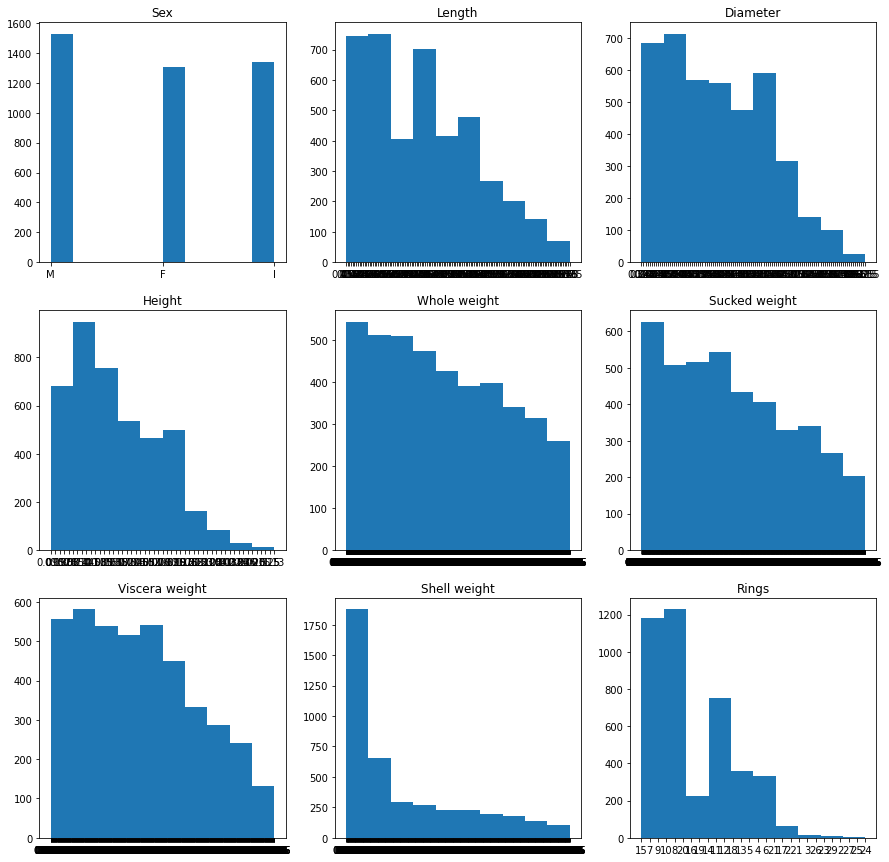

In [11]:
 import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 3,figsize=(15,15))
sum =0;
for i in range(3):
    for j in range(3):
        ax[i][j].set_title(col_names[sum])
        ax[i][j].hist(get_column(col_names[sum]))
        sum +=1


plt.show()

## Part 4: Scatter plots

#### Question 9 [15 Points]
Now ceate a grid of scatter plots for each column vs the "Rings" column. Use color to distinguish the sex of the specimen in each plot. Make titles of the form "&lt;colname&gt; vs Rings". Its fine to include "Rings vs Rings" as the last plot. Add regression lines to the scatter plots.

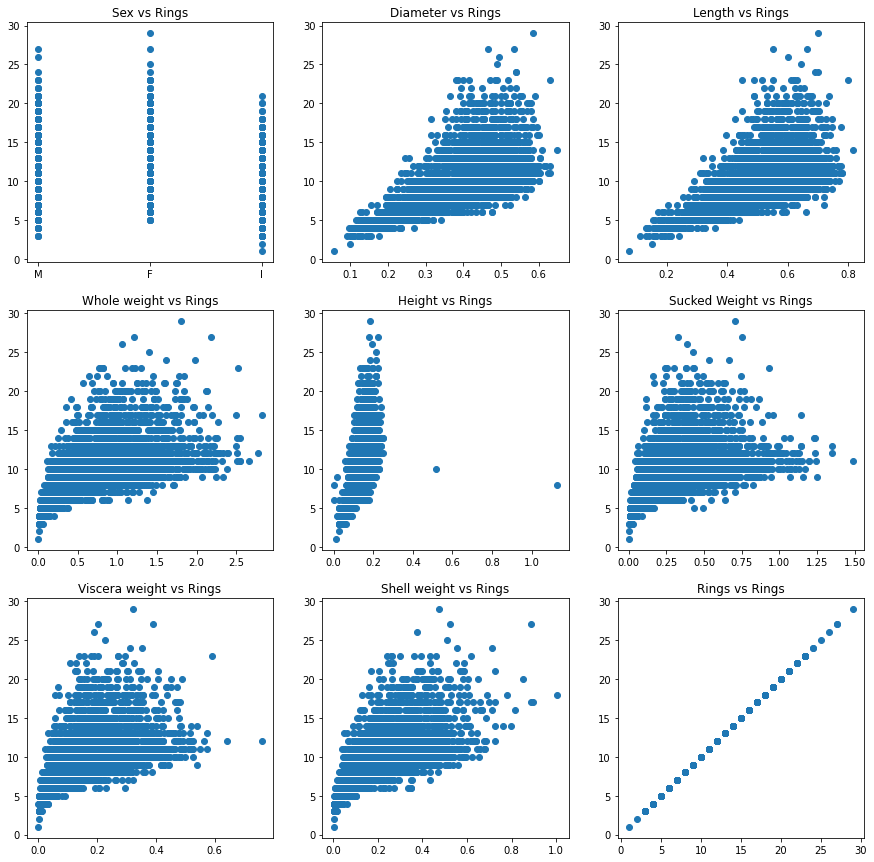

In [12]:
rings = get_column("Rings")
sex = get_column("Sex")
fig, ax = plt.subplots(3, 3, figsize = (15,15))
ax = ax.flatten()

ax[0].scatter(x = summaries['Sex'], y = summaries['Rings'])
ax[0].set_title("Sex vs Rings")

ax[1].scatter(x = summaries['Diameter'], y = summaries['Rings'])
ax[1].set_title("Diameter vs Rings")

ax[2].scatter(x = summaries['Length'], y = summaries['Rings'])
ax[2].set_title("Length vs Rings")

ax[3].scatter(x = summaries['Whole weight'], y = summaries['Rings'])
ax[3].set_title("Whole weight vs Rings")

ax[4].scatter(x = summaries['Height'], y = summaries['Rings'])
ax[4].set_title("Height vs Rings")

ax[5].scatter(x = summaries['Sucked weight'], y = summaries['Rings'])
ax[5].set_title("Sucked Weight vs Rings")

ax[6].scatter(x = summaries['Viscera weight'], y = summaries['Rings'])
ax[6].set_title("Viscera weight vs Rings")

ax[7].scatter(x = summaries['Shell weight'], y = summaries['Rings'])
ax[7].set_title("Shell weight vs Rings")
ax[7].set_prop_cycle(color=['red'])

ax[8].scatter(x = summaries['Rings'], y = summaries['Rings'])
ax[8].set_title("Rings vs Rings")


plt.show()



#### Question 10 [5 Points]
Do you notice any issues with the dataset? e.g. outliers?

Yes there is some outlier present in the plot. It means that some values are really far from the normal values that are present in the dataset. We can use various test like Z score test to find the outlier if we had not seen them here. 